# Machine Learning Analysis

<div class="alert alert-block alert-info">
We will develop some Machine Learning techniques with our data in order to try to classify the samples in FastSurfer/FreeSurfer.
If FastSurfer actually get results similar to FreeSurfer, we will expect some metrics such as 'accuracy' to be very low. Otherwise, we will get good metrics.
At first, we will include all the regions in the data. We expect the accuracy to be high because there are some regions in FastSurfer whose values are not distributed like in FreeSurfer.
Afterwards, we will remove those regions that are not similar in both Softwares, so we will expect low accuracies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

In [2]:
concat_df = pd.read_pickle('all_stats_f7.pkl')
statsFastSurfer = pd.read_pickle('statsFastSurfer_f7.pkl')
statsFreeSurfer = pd.read_pickle('statsFreeSurfer_f7.pkl')

In [3]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                               
10010   FastSurfer          1252.3         1545.0            0.0     23478.7   
        FreeSurfer7         1160.4         1395.3            0.0     23388.7   
10011   FastSurfer          1395.7         1464.9            0.0     20967.4   
        FreeSurfer7         1243.8         1341.1            0.0     20558.4   
10012   FastSurfer          1373.6         1385.9            0.0     21221.4   

                      BrainSegVol  BrainSegVolNotVent  CC_Anterior  \
subject Software                                                     
10010   FastSurfer   1.130872e+06        1.103652e+06       1159.2   
        FreeSurfer7  1.140177e+06        1.113767e+06        723.8   
10011   FastSurfer   1.013429e+06        9.930320e+05        703.7   
        FreeSurfer7  1.006308e+06        9.865598e+05        520.4   
10012   FastSurfer   1.074364e+06        1.042517e+06        981.2   

                     CC_Central  CC_Mid_Anterior  CC_Mid_Posterior  ...  \
subject Software                                                    ...   
10010   FastSurfer        914.5            541.8             550.7  ...   
        FreeSurfer7       360.5            402.9             395.7  ...   
10011   FastSurfer        339.2            350.5             329.4  ...   
        FreeSurfer7       256.3            260.9             253.9  ...   
10012   FastSurfer        712.4            388.5             462.9  ...   

                     SubCortGrayVol  SupraTentorialVol  \
subject Software                                         
10010   FastSurfer     58464.000000      985329.127032   
        FreeSurfer7    58854.093750      990306.421875   
10011   FastSurfer     50086.000000      895651.319629   
        FreeSurfer7    51836.203125      881055.562500   
10012   FastSurfer     51157.000000      958722.844341   

                     SupraTentorialVolNotVent   TotalGrayVol  \
subject Software                                               
10010   FastSurfer              962081.127032  606493.534351   
        FreeSurfer7             963896.625000  620161.819810   
10011   FastSurfer              879223.319629  579274.765061   
        FreeSurfer7             861307.171875  579510.277307   
10012   FastSurfer              930585.844341  584596.562471   

                     WM-hypointensities  lhCerebralWhiteMatterVol  \
subject Software                                                    
10010   FastSurfer               2402.2             235160.339637   
        FreeSurfer7              1997.8             233609.484375   
10011   FastSurfer               1071.5             195681.058639   
        FreeSurfer7              1167.6             189834.468750   
10012   FastSurfer               1390.8             215145.144558   

                       lhCortexVol  non-WM-hypointensities  \
subject Software                                             
10010   FastSurfer   220400.716587                     0.0   
        FreeSurfer7  223312.769133                    12.3   
10011   FastSurfer   218365.416744                     0.0   
        FreeSurfer7  213108.455452                     4.0   
10012   FastSurfer   219214.854598                     0.0   

                     rhCerebralWhiteMatterVol    rhCortexVol  
subject Software                                              
10010   FastSurfer              231447.253043  215464.817764  
        FreeSurfer7             228810.234375  220056.003802  
10011   FastSurfer              196481.495929  217480.348316  
        FreeSurfer7             191989.828125  214773.196854  
10012   FastSurfer              218237.137312  225925.707873  

[5 rows x 55 columns]

## Preprocessing

In [4]:
concat_df.reset_index(inplace=True)

In [5]:
concat_df.columns

Index(['subject', 'Software', '3rd-Ventricle', '4th-Ventricle',
       '5th-Ventricle', 'Brain-Stem', 'BrainSegVol', 'BrainSegVolNotVent',
       'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior',
       'CC_Posterior', 'CSF', 'CerebralWhiteMatterVol', 'Left-Accumbens-area',
       'Left-Amygdala', 'Left-Caudate', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Left-Hippocampus', 'Left-Inf-Lat-Vent',
       'Left-Lateral-Ventricle', 'Left-Pallidum', 'Left-Putamen',
       'Left-VentralDC', 'Left-WM-hypointensities', 'Left-choroid-plexus',
       'Left-non-WM-hypointensities', 'Left-vessel', 'MaskVol', 'Optic-Chiasm',
       'Right-Accumbens-area', 'Right-Amygdala', 'Right-Caudate',
       'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter',
       'Right-Hippocampus', 'Right-Inf-Lat-Vent', 'Right-Lateral-Ventricle',
       'Right-Pallidum', 'Right-Putamen', 'Right-VentralDC',
       'Right-WM-hypointensities', 'Right-choroid-plexus',
       'Ri

<div class="alert alert-block alert-info">
    
We will replace the output (FastSurfer and FreeSurfer) for 0 and 1

In [6]:
concat_df['Software'].replace(to_replace='FastSurfer', value=0, inplace=True)
concat_df['Software'].replace(to_replace='FreeSurfer7', value=1, inplace=True)

In [7]:
concat_df.head()

subject  Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
0    10010         0         1252.3         1545.0            0.0     23478.7   
1    10010         1         1160.4         1395.3            0.0     23388.7   
2    10011         0         1395.7         1464.9            0.0     20967.4   
3    10011         1         1243.8         1341.1            0.0     20558.4   
4    10012         0         1373.6         1385.9            0.0     21221.4   

    BrainSegVol  BrainSegVolNotVent  CC_Anterior  CC_Central  ...  \
0  1.130872e+06        1.103652e+06       1159.2       914.5  ...   
1  1.140177e+06        1.113767e+06        723.8       360.5  ...   
2  1.013429e+06        9.930320e+05        703.7       339.2  ...   
3  1.006308e+06        9.865598e+05        520.4       256.3  ...   
4  1.074364e+06        1.042517e+06        981.2       712.4  ...   

   SubCortGrayVol  SupraTentorialVol  SupraTentorialVolNotVent   TotalGrayVol  \
0    58464.000000      985329.127032             962081.127032  606493.534351   
1    58854.093750      990306.421875             963896.625000  620161.819810   
2    50086.000000      895651.319629             879223.319629  579274.765061   
3    51836.203125      881055.562500             861307.171875  579510.277307   
4    51157.000000      958722.844341             930585.844341  584596.562471   

   WM-hypointensities  lhCerebralWhiteMatterVol    lhCortexVol  \
0              2402.2             235160.339637  220400.716587   
1              1997.8             233609.484375  223312.769133   
2              1071.5             195681.058639  218365.416744   
3              1167.6             189834.468750  213108.455452   
4              1390.8             215145.144558  219214.854598   

   non-WM-hypointensities  rhCerebralWhiteMatterVol    rhCortexVol  
0                     0.0             231447.253043  215464.817764  
1                    12.3             228810.234375  220056.003802  
2                     0.0             196481.495929  217480.348316  
3                     4.0             191989.828125  214773.196854  
4                     0.0             218237.137312  225925.707873  

[5 rows x 57 columns]

In [8]:
concat_df.drop('subject',axis=1, inplace=True)

In [9]:
concat_df.head()

Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
0         0         1252.3         1545.0            0.0     23478.7   
1         1         1160.4         1395.3            0.0     23388.7   
2         0         1395.7         1464.9            0.0     20967.4   
3         1         1243.8         1341.1            0.0     20558.4   
4         0         1373.6         1385.9            0.0     21221.4   

    BrainSegVol  BrainSegVolNotVent  CC_Anterior  CC_Central  CC_Mid_Anterior  \
0  1.130872e+06        1.103652e+06       1159.2       914.5            541.8   
1  1.140177e+06        1.113767e+06        723.8       360.5            402.9   
2  1.013429e+06        9.930320e+05        703.7       339.2            350.5   
3  1.006308e+06        9.865598e+05        520.4       256.3            260.9   
4  1.074364e+06        1.042517e+06        981.2       712.4            388.5   

   ...  SubCortGrayVol  SupraTentorialVol  SupraTentorialVolNotVent  \
0  ...    58464.000000      985329.127032             962081.127032   
1  ...    58854.093750      990306.421875             963896.625000   
2  ...    50086.000000      895651.319629             879223.319629   
3  ...    51836.203125      881055.562500             861307.171875   
4  ...    51157.000000      958722.844341             930585.844341   

    TotalGrayVol  WM-hypointensities  lhCerebralWhiteMatterVol    lhCortexVol  \
0  606493.534351              2402.2             235160.339637  220400.716587   
1  620161.819810              1997.8             233609.484375  223312.769133   
2  579274.765061              1071.5             195681.058639  218365.416744   
3  579510.277307              1167.6             189834.468750  213108.455452   
4  584596.562471              1390.8             215145.144558  219214.854598   

   non-WM-hypointensities  rhCerebralWhiteMatterVol    rhCortexVol  
0                     0.0             231447.253043  215464.817764  
1                    12.3             228810.234375  220056.003802  
2                     0.0             196481.495929  217480.348316  
3                     4.0             191989.828125  214773.196854  
4                     0.0             218237.137312  225925.707873  

[5 rows x 56 columns]

In [10]:
concat_df.shape

(2872, 56)

In [11]:
concat_df.describe()

Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle    Brain-Stem  \
count  2872.000000    2872.000000    2872.000000    2872.000000   2872.000000   
mean      0.500000    1300.351219    1816.955501       0.003308  20838.188649   
std       0.500087     474.673049     484.123205       0.071112   2219.823495   
min       0.000000     460.800000     663.400000       0.000000  14782.600000   
25%       0.000000     956.325000    1474.025000       0.000000  19319.725000   
50%       0.500000    1203.900000    1735.950000       0.000000  20677.050000   
75%       1.000000    1535.775000    2091.175000       0.000000  22340.650000   
max       1.000000    4341.000000    6076.800000       2.600000  28267.700000   

        BrainSegVol  BrainSegVolNotVent  CC_Anterior   CC_Central  \
count  2.872000e+03        2.872000e+03  2872.000000  2872.000000   
mean   1.073514e+06        1.045736e+06   782.675418   482.010724   
std    1.024641e+05        9.907330e+04   194.663040   184.218431   
min    7.908040e+05        7.660560e+05   342.700000   183.100000   
25%    9.990611e+05        9.747271e+05   636.925000   332.550000   
50%    1.067418e+06        1.040348e+06   752.800000   417.050000   
75%    1.141730e+06        1.113618e+06   902.625000   621.825000   
max    1.387998e+06        1.345575e+06  1524.800000  1149.200000   

       CC_Mid_Anterior  ...  SubCortGrayVol  SupraTentorialVol  \
count      2872.000000  ...     2872.000000       2.872000e+03   
mean        430.631233  ...    52698.018184       9.468776e+05   
std         139.888420  ...     4874.512980       9.437019e+04   
min         173.700000  ...    38359.000000       6.828178e+05   
25%         332.900000  ...    49267.640625       8.782834e+05   
50%         397.500000  ...    52492.500000       9.417323e+05   
75%         486.450000  ...    55957.500000       1.008869e+06   
max        1115.600000  ...    68872.000000       1.250859e+06   

       SupraTentorialVolNotVent   TotalGrayVol  WM-hypointensities  \
count              2.872000e+03    2872.000000         2872.000000   
mean               9.212715e+05  594334.671240         2419.618036   
std                9.105463e+04   50689.437109         2177.008228   
min                6.602833e+05  447401.519428          632.300000   
25%                8.562049e+05  558946.347840         1400.975000   
50%                9.156611e+05  591606.855115         1838.000000   
75%                9.816909e+05  626134.982378         2588.825000   
max                1.190503e+06  778846.692866        30672.100000   

       lhCerebralWhiteMatterVol    lhCortexVol  non-WM-hypointensities  \
count               2872.000000    2872.000000             2872.000000   
mean              213471.705353  220702.430735                0.359540   
std                25554.890806   20126.365974                1.924909   
min               144264.434023  163260.322720                0.000000   
25%               194187.170620  206624.704763                0.000000   
50%               211869.729818  219544.352939                0.000000   
75%               231269.248965  233360.530574                0.000000   
max               303838.387755  297953.687467               35.800000   

       rhCerebralWhiteMatterVol    rhCortexVol  
count               2872.000000    2872.000000  
mean              213348.384161  220901.033588  
std                25487.915946   20202.610236  
min               143647.918584  160374.527736  
25%               194447.915265  207148.259134  
50%               212030.854925  219596.948126  
75%               230830.154655  233788.173761  
max               304417.018195  302706.476319  

[8 rows x 56 columns]

## Correlation map in FastSurfer stats

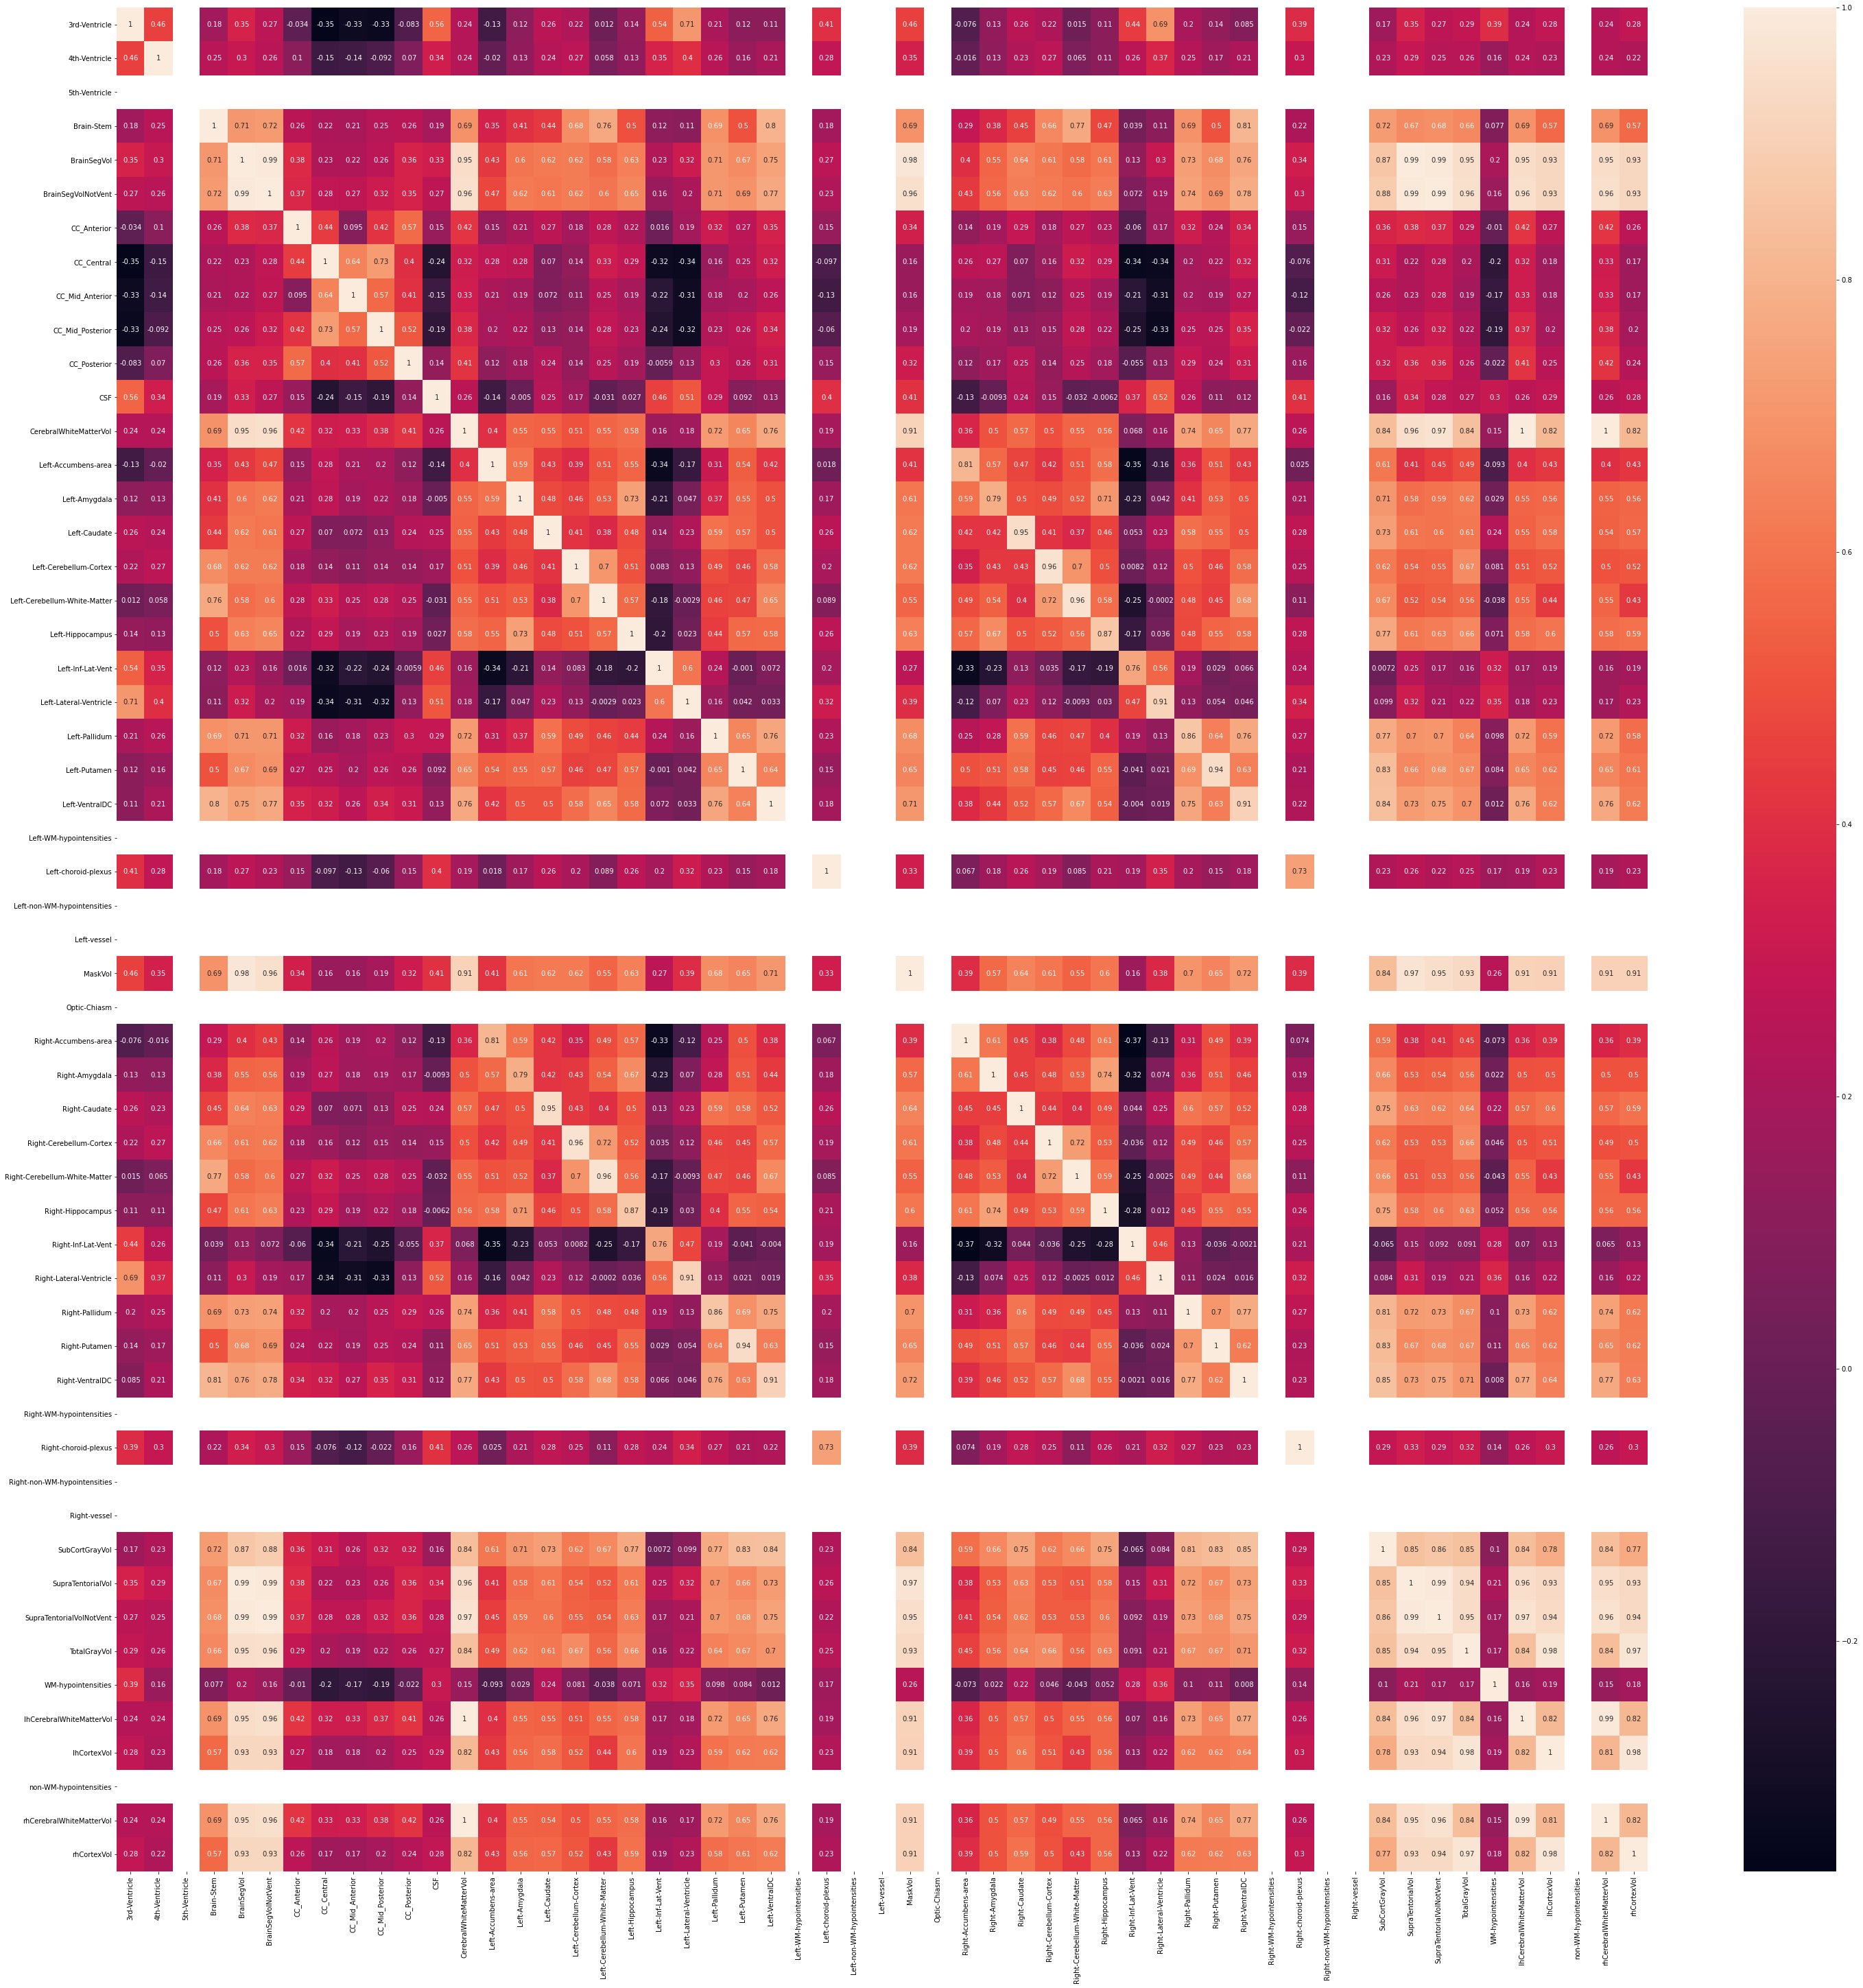

In [12]:
#Correlation map
f, ax = plt.subplots(figsize=(50, 50))
corr = statsFastSurfer.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('corr_map_FastSurfer.png')
plt.show()

## Catboost Classifier with all the regions included

In [13]:
y = concat_df.Software
x = concat_df.drop(columns=['Software'])

#### Split in train and test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Split in train and validation

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1837, 55)
(575, 55)
(460, 55)


Learning rate set to 0.06762
0:	learn: 0.4907827	test: 0.4924566	best: 0.4924566 (0)	total: 10.1ms	remaining: 10.1s
1:	learn: 0.3492400	test: 0.3502153	best: 0.3502153 (1)	total: 28.5ms	remaining: 14.2s
2:	learn: 0.2486328	test: 0.2495147	best: 0.2495147 (2)	total: 42.6ms	remaining: 14.2s
3:	learn: 0.1782084	test: 0.1789246	best: 0.1789246 (3)	total: 56.9ms	remaining: 14.2s
4:	learn: 0.1291968	test: 0.1303502	best: 0.1303502 (4)	total: 74.2ms	remaining: 14.8s
5:	learn: 0.0943601	test: 0.0952867	best: 0.0952867 (5)	total: 83.1ms	remaining: 13.8s
6:	learn: 0.0698886	test: 0.0708668	best: 0.0708668 (6)	total: 107ms	remaining: 15.2s
7:	learn: 0.0508607	test: 0.0519834	best: 0.0519834 (7)	total: 116ms	remaining: 14.4s
8:	learn: 0.0391626	test: 0.0402699	best: 0.0402699 (8)	total: 134ms	remaining: 14.8s
9:	learn: 0.0293216	test: 0.0301574	best: 0.0301574 (9)	total: 145ms	remaining: 14.3s
10:	learn: 0.0224055	test: 0.0231718	best: 0.0231718 (10)	total: 155ms	remaining: 14s
11:	learn: 0.017310

95:	learn: 0.0001713	test: 0.0007655	best: 0.0007655 (95)	total: 1.23s	remaining: 11.6s
96:	learn: 0.0001671	test: 0.0007744	best: 0.0007655 (95)	total: 1.24s	remaining: 11.5s
97:	learn: 0.0001631	test: 0.0007838	best: 0.0007655 (95)	total: 1.25s	remaining: 11.5s
98:	learn: 0.0001609	test: 0.0007906	best: 0.0007655 (95)	total: 1.26s	remaining: 11.4s
99:	learn: 0.0001590	test: 0.0007915	best: 0.0007655 (95)	total: 1.27s	remaining: 11.4s
100:	learn: 0.0001577	test: 0.0007869	best: 0.0007655 (95)	total: 1.28s	remaining: 11.4s
101:	learn: 0.0001553	test: 0.0007737	best: 0.0007655 (95)	total: 1.29s	remaining: 11.4s
102:	learn: 0.0001539	test: 0.0007661	best: 0.0007655 (95)	total: 1.31s	remaining: 11.4s
103:	learn: 0.0001520	test: 0.0007707	best: 0.0007655 (95)	total: 1.32s	remaining: 11.4s
104:	learn: 0.0001520	test: 0.0007709	best: 0.0007655 (95)	total: 1.33s	remaining: 11.4s
105:	learn: 0.0001501	test: 0.0007758	best: 0.0007655 (95)	total: 1.35s	remaining: 11.4s
106:	learn: 0.0001500	test

195:	learn: 0.0000816	test: 0.0006388	best: 0.0006388 (195)	total: 2.47s	remaining: 10.1s
196:	learn: 0.0000814	test: 0.0006376	best: 0.0006376 (196)	total: 2.48s	remaining: 10.1s
197:	learn: 0.0000805	test: 0.0006367	best: 0.0006367 (197)	total: 2.49s	remaining: 10.1s
198:	learn: 0.0000801	test: 0.0006363	best: 0.0006363 (198)	total: 2.5s	remaining: 10.1s
199:	learn: 0.0000800	test: 0.0006363	best: 0.0006363 (199)	total: 2.52s	remaining: 10.1s
200:	learn: 0.0000797	test: 0.0006369	best: 0.0006363 (199)	total: 2.53s	remaining: 10.1s
201:	learn: 0.0000797	test: 0.0006369	best: 0.0006363 (199)	total: 2.54s	remaining: 10s
202:	learn: 0.0000793	test: 0.0006388	best: 0.0006363 (199)	total: 2.56s	remaining: 10s
203:	learn: 0.0000793	test: 0.0006389	best: 0.0006363 (199)	total: 2.57s	remaining: 10s
204:	learn: 0.0000793	test: 0.0006389	best: 0.0006363 (199)	total: 2.58s	remaining: 10s
205:	learn: 0.0000793	test: 0.0006390	best: 0.0006363 (199)	total: 2.6s	remaining: 10s
206:	learn: 0.0000793	

300:	learn: 0.0000589	test: 0.0005952	best: 0.0005910 (297)	total: 3.92s	remaining: 9.1s
301:	learn: 0.0000587	test: 0.0005961	best: 0.0005910 (297)	total: 3.93s	remaining: 9.08s
302:	learn: 0.0000587	test: 0.0005961	best: 0.0005910 (297)	total: 3.95s	remaining: 9.08s
303:	learn: 0.0000587	test: 0.0005960	best: 0.0005910 (297)	total: 3.96s	remaining: 9.07s
304:	learn: 0.0000586	test: 0.0005960	best: 0.0005910 (297)	total: 3.98s	remaining: 9.07s
305:	learn: 0.0000586	test: 0.0005960	best: 0.0005910 (297)	total: 4s	remaining: 9.06s
306:	learn: 0.0000586	test: 0.0005959	best: 0.0005910 (297)	total: 4.01s	remaining: 9.05s
307:	learn: 0.0000583	test: 0.0005956	best: 0.0005910 (297)	total: 4.02s	remaining: 9.04s
308:	learn: 0.0000580	test: 0.0005931	best: 0.0005910 (297)	total: 4.04s	remaining: 9.02s
309:	learn: 0.0000580	test: 0.0005931	best: 0.0005910 (297)	total: 4.05s	remaining: 9.01s
310:	learn: 0.0000580	test: 0.0005930	best: 0.0005910 (297)	total: 4.07s	remaining: 9.01s
311:	learn: 0.

404:	learn: 0.0000460	test: 0.0005821	best: 0.0005779 (373)	total: 5.38s	remaining: 7.9s
405:	learn: 0.0000459	test: 0.0005825	best: 0.0005779 (373)	total: 5.4s	remaining: 7.89s
406:	learn: 0.0000457	test: 0.0005823	best: 0.0005779 (373)	total: 5.41s	remaining: 7.88s
407:	learn: 0.0000457	test: 0.0005823	best: 0.0005779 (373)	total: 5.42s	remaining: 7.87s
408:	learn: 0.0000456	test: 0.0005813	best: 0.0005779 (373)	total: 5.43s	remaining: 7.85s
409:	learn: 0.0000456	test: 0.0005812	best: 0.0005779 (373)	total: 5.45s	remaining: 7.84s
410:	learn: 0.0000455	test: 0.0005816	best: 0.0005779 (373)	total: 5.46s	remaining: 7.83s
411:	learn: 0.0000454	test: 0.0005821	best: 0.0005779 (373)	total: 5.47s	remaining: 7.81s
412:	learn: 0.0000453	test: 0.0005825	best: 0.0005779 (373)	total: 5.49s	remaining: 7.8s
413:	learn: 0.0000453	test: 0.0005824	best: 0.0005779 (373)	total: 5.5s	remaining: 7.79s
414:	learn: 0.0000453	test: 0.0005824	best: 0.0005779 (373)	total: 5.52s	remaining: 7.78s
415:	learn: 0.

509:	learn: 0.0000394	test: 0.0005723	best: 0.0005714 (489)	total: 6.82s	remaining: 6.56s
510:	learn: 0.0000393	test: 0.0005721	best: 0.0005714 (489)	total: 6.83s	remaining: 6.54s
511:	learn: 0.0000392	test: 0.0005725	best: 0.0005714 (489)	total: 6.85s	remaining: 6.53s
512:	learn: 0.0000391	test: 0.0005739	best: 0.0005714 (489)	total: 6.86s	remaining: 6.51s
513:	learn: 0.0000390	test: 0.0005733	best: 0.0005714 (489)	total: 6.88s	remaining: 6.5s
514:	learn: 0.0000391	test: 0.0005733	best: 0.0005714 (489)	total: 6.89s	remaining: 6.49s
515:	learn: 0.0000390	test: 0.0005732	best: 0.0005714 (489)	total: 6.91s	remaining: 6.48s
516:	learn: 0.0000390	test: 0.0005728	best: 0.0005714 (489)	total: 6.92s	remaining: 6.47s
517:	learn: 0.0000390	test: 0.0005727	best: 0.0005714 (489)	total: 6.93s	remaining: 6.45s
518:	learn: 0.0000389	test: 0.0005723	best: 0.0005714 (489)	total: 6.95s	remaining: 6.44s
519:	learn: 0.0000388	test: 0.0005733	best: 0.0005714 (489)	total: 6.97s	remaining: 6.43s
520:	learn:

609:	learn: 0.0000347	test: 0.0005649	best: 0.0005644 (605)	total: 8.29s	remaining: 5.3s
610:	learn: 0.0000347	test: 0.0005650	best: 0.0005644 (605)	total: 8.3s	remaining: 5.28s
611:	learn: 0.0000346	test: 0.0005661	best: 0.0005644 (605)	total: 8.31s	remaining: 5.27s
612:	learn: 0.0000346	test: 0.0005664	best: 0.0005644 (605)	total: 8.33s	remaining: 5.26s
613:	learn: 0.0000345	test: 0.0005677	best: 0.0005644 (605)	total: 8.34s	remaining: 5.24s
614:	learn: 0.0000345	test: 0.0005677	best: 0.0005644 (605)	total: 8.36s	remaining: 5.23s
615:	learn: 0.0000345	test: 0.0005677	best: 0.0005644 (605)	total: 8.37s	remaining: 5.22s
616:	learn: 0.0000344	test: 0.0005684	best: 0.0005644 (605)	total: 8.38s	remaining: 5.2s
617:	learn: 0.0000344	test: 0.0005684	best: 0.0005644 (605)	total: 8.4s	remaining: 5.19s
618:	learn: 0.0000344	test: 0.0005689	best: 0.0005644 (605)	total: 8.41s	remaining: 5.18s
619:	learn: 0.0000343	test: 0.0005699	best: 0.0005644 (605)	total: 8.43s	remaining: 5.17s
620:	learn: 0.

709:	learn: 0.0000311	test: 0.0005690	best: 0.0005644 (605)	total: 9.77s	remaining: 3.99s
710:	learn: 0.0000311	test: 0.0005699	best: 0.0005644 (605)	total: 9.78s	remaining: 3.98s
711:	learn: 0.0000311	test: 0.0005698	best: 0.0005644 (605)	total: 9.8s	remaining: 3.96s
712:	learn: 0.0000311	test: 0.0005699	best: 0.0005644 (605)	total: 9.81s	remaining: 3.95s
713:	learn: 0.0000311	test: 0.0005698	best: 0.0005644 (605)	total: 9.83s	remaining: 3.94s
714:	learn: 0.0000310	test: 0.0005707	best: 0.0005644 (605)	total: 9.84s	remaining: 3.92s
715:	learn: 0.0000310	test: 0.0005705	best: 0.0005644 (605)	total: 9.86s	remaining: 3.91s
716:	learn: 0.0000310	test: 0.0005711	best: 0.0005644 (605)	total: 9.87s	remaining: 3.9s
717:	learn: 0.0000310	test: 0.0005711	best: 0.0005644 (605)	total: 9.89s	remaining: 3.88s
718:	learn: 0.0000310	test: 0.0005709	best: 0.0005644 (605)	total: 9.9s	remaining: 3.87s
719:	learn: 0.0000310	test: 0.0005709	best: 0.0005644 (605)	total: 9.92s	remaining: 3.86s
720:	learn: 0

809:	learn: 0.0000280	test: 0.0005778	best: 0.0005644 (605)	total: 11.2s	remaining: 2.63s
810:	learn: 0.0000279	test: 0.0005784	best: 0.0005644 (605)	total: 11.2s	remaining: 2.62s
811:	learn: 0.0000279	test: 0.0005783	best: 0.0005644 (605)	total: 11.2s	remaining: 2.6s
812:	learn: 0.0000279	test: 0.0005782	best: 0.0005644 (605)	total: 11.3s	remaining: 2.59s
813:	learn: 0.0000279	test: 0.0005779	best: 0.0005644 (605)	total: 11.3s	remaining: 2.58s
814:	learn: 0.0000279	test: 0.0005779	best: 0.0005644 (605)	total: 11.3s	remaining: 2.56s
815:	learn: 0.0000278	test: 0.0005770	best: 0.0005644 (605)	total: 11.3s	remaining: 2.55s
816:	learn: 0.0000278	test: 0.0005774	best: 0.0005644 (605)	total: 11.3s	remaining: 2.53s
817:	learn: 0.0000278	test: 0.0005774	best: 0.0005644 (605)	total: 11.3s	remaining: 2.52s
818:	learn: 0.0000278	test: 0.0005774	best: 0.0005644 (605)	total: 11.3s	remaining: 2.51s
819:	learn: 0.0000277	test: 0.0005766	best: 0.0005644 (605)	total: 11.4s	remaining: 2.49s
820:	learn:

907:	learn: 0.0000255	test: 0.0005752	best: 0.0005644 (605)	total: 12.7s	remaining: 1.28s
908:	learn: 0.0000255	test: 0.0005750	best: 0.0005644 (605)	total: 12.7s	remaining: 1.27s
909:	learn: 0.0000255	test: 0.0005754	best: 0.0005644 (605)	total: 12.7s	remaining: 1.26s
910:	learn: 0.0000255	test: 0.0005754	best: 0.0005644 (605)	total: 12.7s	remaining: 1.24s
911:	learn: 0.0000255	test: 0.0005758	best: 0.0005644 (605)	total: 12.7s	remaining: 1.23s
912:	learn: 0.0000254	test: 0.0005744	best: 0.0005644 (605)	total: 12.8s	remaining: 1.22s
913:	learn: 0.0000254	test: 0.0005744	best: 0.0005644 (605)	total: 12.8s	remaining: 1.2s
914:	learn: 0.0000254	test: 0.0005744	best: 0.0005644 (605)	total: 12.8s	remaining: 1.19s
915:	learn: 0.0000254	test: 0.0005749	best: 0.0005644 (605)	total: 12.8s	remaining: 1.17s
916:	learn: 0.0000253	test: 0.0005743	best: 0.0005644 (605)	total: 12.8s	remaining: 1.16s
917:	learn: 0.0000253	test: 0.0005749	best: 0.0005644 (605)	total: 12.8s	remaining: 1.15s
918:	learn:

{'learn': {'Logloss': 2.3603498140754555e-05}, 'validation': {'Logloss': 0.0005644389468690623}}
[[283.   0.]
 [  0. 292.]]


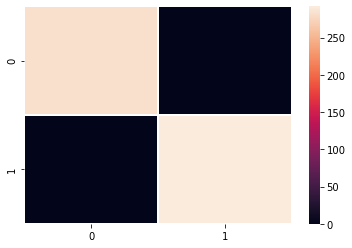

catboost Acc :  1.0


In [17]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=1000,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Acurracy is 100%, so, when we include all the regions in the data, our model is able to classify each subject in the correct Software

## Catboost Classifier with some regions dropped

We have removed those regions that, visually, differ so much from the other Software and also those that haven't been segmentated by the Softwares

In [47]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','Left-Inf-Lat-Vent','Left-VentralDC',
                            'MaskVol','Right-Inf-Lat-Vent','Right-VentralDC',
                            '5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

#### Split in train and test

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

#### Split in train and validation

In [49]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [50]:
print(x_train.shape)
print(x_test.shape)

(1837, 36)
(575, 36)


Learning rate set to 0.175419
0:	learn: 0.6213293	test: 0.6368452	best: 0.6368452 (0)	total: 4.95ms	remaining: 490ms
1:	learn: 0.5773875	test: 0.5928493	best: 0.5928493 (1)	total: 8.82ms	remaining: 432ms
2:	learn: 0.5415461	test: 0.5647688	best: 0.5647688 (2)	total: 11.4ms	remaining: 368ms
3:	learn: 0.5153934	test: 0.5432415	best: 0.5432415 (3)	total: 15.2ms	remaining: 364ms
4:	learn: 0.4962101	test: 0.5269466	best: 0.5269466 (4)	total: 20.5ms	remaining: 389ms
5:	learn: 0.4779119	test: 0.5176436	best: 0.5176436 (5)	total: 23.1ms	remaining: 362ms
6:	learn: 0.4609564	test: 0.5041068	best: 0.5041068 (6)	total: 25.7ms	remaining: 341ms
7:	learn: 0.4491882	test: 0.5001490	best: 0.5001490 (7)	total: 28.3ms	remaining: 326ms
8:	learn: 0.4350121	test: 0.4917667	best: 0.4917667 (8)	total: 31ms	remaining: 313ms
9:	learn: 0.4217094	test: 0.4857562	best: 0.4857562 (9)	total: 33.6ms	remaining: 303ms
10:	learn: 0.4113066	test: 0.4802951	best: 0.4802951 (10)	total: 36.9ms	remaining: 299ms
11:	learn: 0.

{'learn': {'Logloss': 0.12690604453380172}, 'validation': {'Logloss': 0.42278760827105977}}
[[222.  61.]
 [ 58. 234.]]


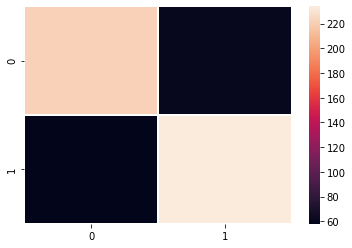

catboost Acc :  0.7930434782608695


In [51]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=100,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Accuracy has gone down to 91%. It's still a high accuracy but now we can demonstrate that our model can't always know where the data came from

In [52]:
import shap
shap.initjs()

In [53]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

<Figure size 1440x1080 with 0 Axes>

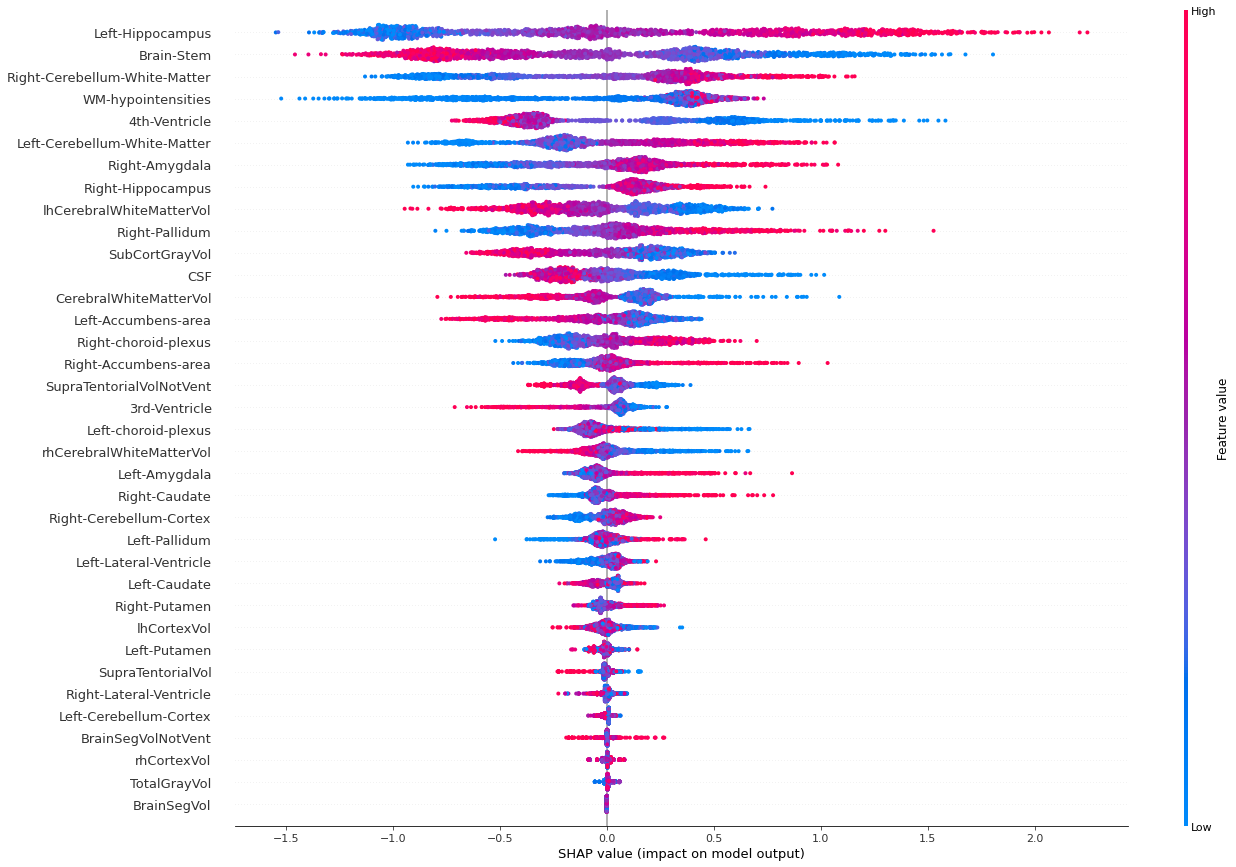

In [54]:
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values, features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,plot_size=(20, 15),show=False, )
plt.savefig('MLshap1.png')

<div class="alert alert-block alert-info">
The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a low Left-VentralDC tends the output to be 1 (FreeSurfer7)

In [26]:
shap.force_plot(explainer.expected_value, shap_values, x_train)

## Random Forest

In [27]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','Left-Inf-Lat-Vent',
                            'MaskVol','Right-Inf-Lat-Vent',
                            '5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

<div class="alert alert-block alert-info">
First, we will make hyperparameter tuning in order to find the best hyperparameters for the model

In [30]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [31]:
print(bestF.best_params_)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


<div class="alert alert-block alert-info">
Once we've found the best parameter, we introduce them into the model

In [32]:
forestOpt = RandomForestClassifier(random_state = 3, max_depth = 25,
                                   n_estimators = 500, min_samples_split = 2, 
                                   min_samples_leaf = 2)

In [33]:
from sklearn.metrics import accuracy_score
modelOpt = forestOpt.fit(x_train, y_train)
y_pred = modelOpt.predict(x_test)


accuracy_score(y_test,y_pred)

0.8921739130434783

<div class="alert alert-block alert-info">
Random Forest Classifier with hyperparameter tuning offers 88% accuracy, a result similar to the one obtained with CatBoost Classifier

In [34]:
import shap
shap.initjs()

In [35]:
explainer = shap.TreeExplainer(modelOpt)
shap_values = explainer.shap_values(x_train)

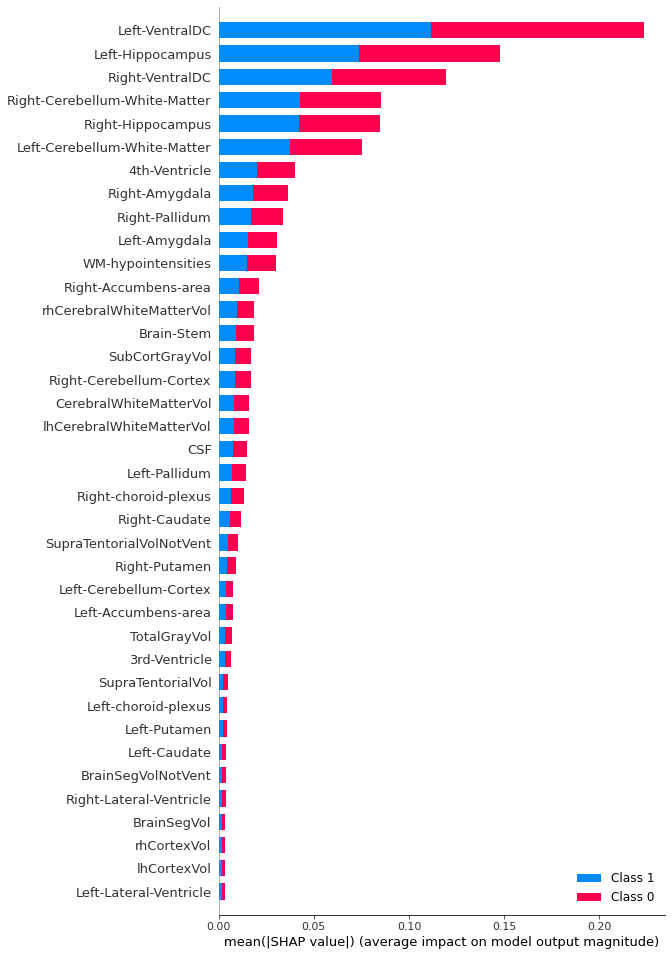

In [36]:
fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values, features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,show=False, )


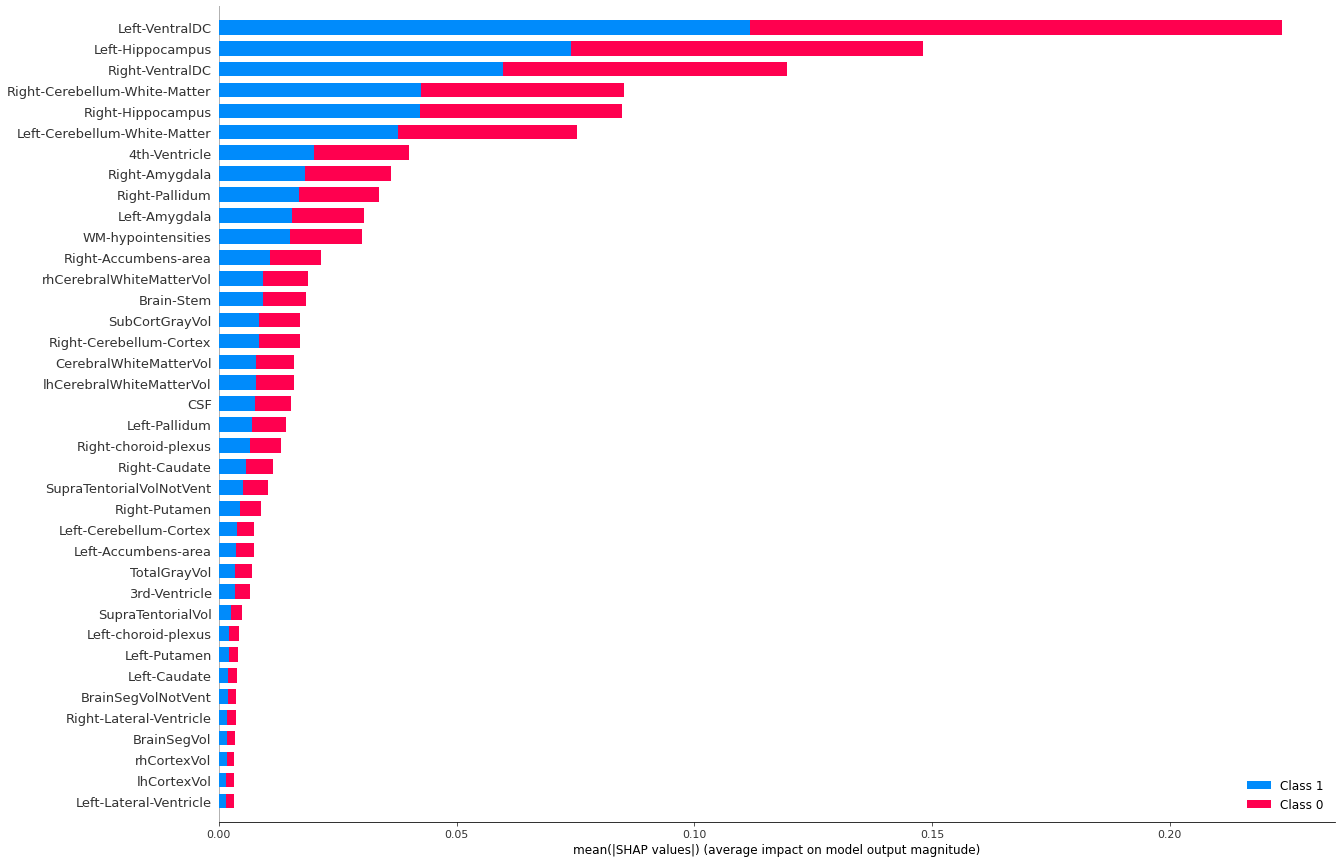

In [37]:
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values, features = x_train,
max_display=len(x_train.columns),
plot_type="bar",
plot_size=(20, 15), show=False)
plt.xlabel('mean(|SHAP values|) (average impact on model output magnitude)',fontsize=12)
plt.savefig('MLplot.png')